<a href="https://colab.research.google.com/github/akash155/M.P.AKASH/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

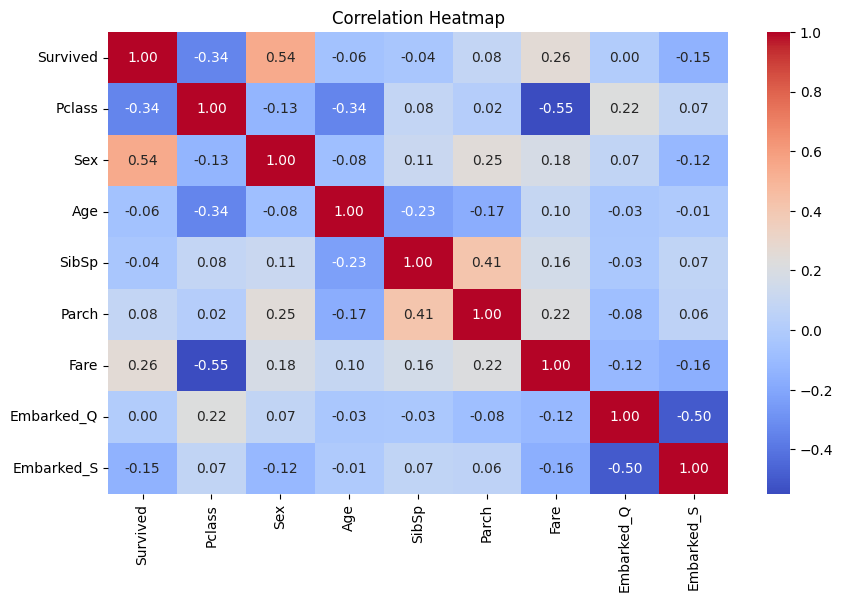

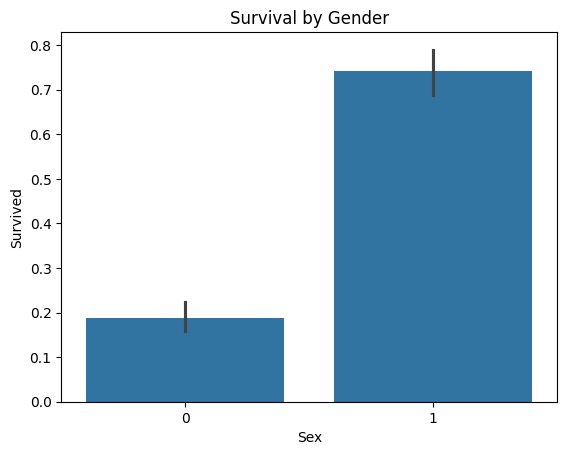

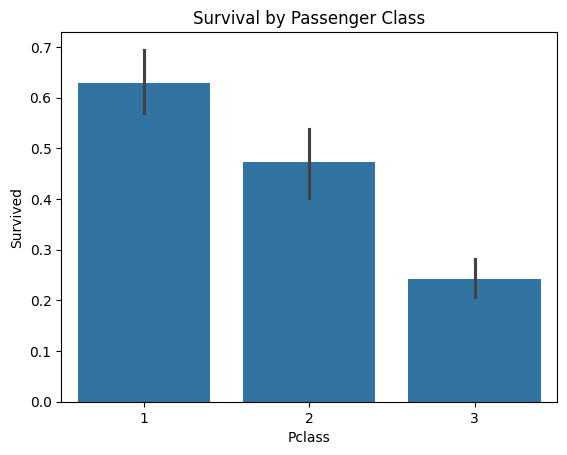

Evaluating Logistic Regression...
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639
Confusion Matrix:
 [[90 15]
 [19 55]]


Evaluating Decision Tree...
Accuracy: 0.7821
Precision: 0.7333
Recall: 0.7432
F1 Score: 0.7383
Confusion Matrix:
 [[85 20]
 [19 55]]


Evaluating Random Forest...
Accuracy: 0.8324
Precision: 0.8056
Recall: 0.7838
F1 Score: 0.7945
Confusion Matrix:
 [[91 14]
 [16 58]]




In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the Titanic dataset
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')

# Data Cleaning and Handling Missing Values
# Fill missing 'Age' with median and 'Embarked' with mode
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to too many missing values
titanic_data.drop(columns=['Cabin'], inplace=True)

# Drop unnecessary columns like 'PassengerId', 'Ticket', 'Name' for modeling purposes
titanic_data.drop(columns=['PassengerId', 'Ticket', 'Name'], inplace=True)

# Convert categorical variables 'Sex' and 'Embarked' to numerical
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

# Exploratory Data Analysis (EDA)
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Bar plot for survival by gender
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival by Gender')
plt.show()

# Survival rate by Passenger Class (Pclass)
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival by Passenger Class')
plt.show()

# Model Building
# Define features (X) and target (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logreg = LogisticRegression(max_iter=1000)
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

# Train and evaluate models
models = {'Logistic Regression': logreg, 'Decision Tree': tree, 'Random Forest': forest}

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
    print("\n")

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    evaluate_model(model, X_train, X_test, y_train, y_test)
